# Quantum Computing Lab 3: Multi Qubit Gates

In [1]:
import numpy as np

In [64]:
def H_gate():
    return 1 / np.sqrt(2) * np.array([[1, 1], [1, -1]])
def X_gate():
    return np.array([[0, 1], [1, 0]])
def Y_gate():
    return np.array([[0, -1j], [1j, 0]])
def Z_gate():
    return np.array([[1, 0], [0, -1]])
def S_gate():
    return np.array([[1, 0], [0, 1j]])
def CNOT_gate():
    return np.array([
        [1, 0, 0, 0],
        [0, 1, 0, 0],
        [0, 0, 0, 1],
        [0, 0, 1, 0]
    ])
def CH_gate():
    return np.array([
        [1, 0, 0, 0],
        [0, 1/np.sqrt(2), 0, 1/np.sqrt(2)],
        [0, 0, 1, 0],
        [0, 1/np.sqrt(2), 0, 1/np.sqrt(2)]
    ])
def SWAP_gate():
    return np.array([
        [0, 1],
        [1, 0]
    ])
def CNOT10_gate():
    return np.array([
        [1, 0, 0, 0],
        [0, 0, 0, 1],
        [0, 0, 1, 0],
        [0, 1, 0, 0]
    ])
def toffoli_gate():
    return np.array([
        [1, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 1, 0]
    ])

In [65]:
print(toffoli_gate())

[[1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 1 0]]


In [98]:
class State:
    def __init__(self, n_qubits):
        self.n_qubits = n_qubits
        self.state = np.zeros(2**n_qubits, dtype=np.complex128)

    def initialize_state(self, qubit_values):
        assert len(qubit_values) == self.n_qubits
        
        index = int("".join(str(bit) for bit in qubit_values), 2)
        self.state = np.zeros(2**self.n_qubits, dtype=np.complex128)
        self.state[index] = 1.0
            
    
    def apply_gate(self, gate, n_gate, starting_qubit):
        unit_op = 1
        i = 0
        while i < self.n_qubits:
            # print(i)
            if i == starting_qubit:
                unit_op = np.kron(unit_op, gate)
                i += (n_gate - 1) # Sare restul de n_gate - 1 qbiti
            else:
                unit_op = np.kron(unit_op, np.eye(2))
            i += 1
        # print(unit_op.shape, self.state.shape)
        # self.state = np.matmul(unit_op, self.state)
        self.state = unit_op @ self.state
        
    def apply_H_gate(self, target_qubit):
        self.apply_gate(H_gate(), 1, target_qubit)
        
    def apply_X_gate(self, target_qubit):
        self.apply_gate(X_gate(), 1, target_qubit)
    
    def apply_S_gate(self, target_qubit):
        self.apply_gate(S_gate(), 1, target_qubit)
        
    def apply_CNOT_gate(self, target_qubit):
        self.apply_gate(CNOT_gate(), 2, target_qubit)
        
    def apply_CH_gate(self, target_qubit):
        self.apply_gate(CH_gate(), 2, target_qubit)
    
    def apply_SWAP_gate(self, target_qubit):
        self.apply_gate(SWAP_gate(), 1, target_qubit)
    
    def apply_CNOT10_gate(self, target_qubit):
        self.apply_gate(CNOT10_gate(), 2, target_qubit)
    
    def apply_TOFFOLI_gate(self, target_qubit):
        self.apply_gate(toffoli_gate(), 3, target_qubit)
    
    def produce_measurement(self):
        probabilities = np.array([np.abs(st) for st in self.state], dtype=np.float32)
        probabilities /= probabilities.sum()
        out = np.random.choice(range(len(self.state)), p=probabilities)
        measures = [int(bit) for bit in f"{out:0{self.n_qubits}b}"]
        return measures
        

In [100]:
qstate = State(5)
qstate.initialize_state([0,1,1,0,0])
qstate.apply_H_gate(0)
qstate.apply_X_gate(1)
qstate.apply_CNOT10_gate(0)
print(qstate.produce_measurement())
print(qstate.produce_measurement())
print(qstate.produce_measurement())

[1, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]


### Part 1: Multi qubit gates

#### 1.1: Define state
Fill in the `__init__` function.

An n-qubit state is an array of 2^n coefficients (one for each possible value of the qubits).

#### 1.2: Initialize state
Fill in the `initialize_state` function.

The function receives an array of desired value for each qubit, e.g. `[0,1,0,0]` for a 4-qubit system. The function should set the state accordingly.

#### 1.3: Apply a gate
Fill in the `apply_gate` function

This function generates the unitary matrix which applies the `gate` gate to the current `state`. The parameter `n_gate` represents the number of qubits affected by the gate (e.g. for a `H` gate it would be 1; for a `CNOT` gate it would be 2). The `starting_qubit` represents the first qubit affected by the gate.

Hint: `np.kron`


#### 1.4: Define single qubit gates
Fill in the functions to define the H, X, S gates.

Hint: use `apply_gate`

#### 1.5: Define multi qubit gates
Fill in the functions to define the CNOT, CH, SWAP, Toffoli gates. Hint: use `apply_gate`

The CNOT10 represents a reverse CNOT (i.e. first bit is the target and second is the control). Exercise: compute the 2-qubit matrix for CNOT10.


#### 1.6: Measure the state
Fill in the `produce_measurement` function.

The function should randomly measure according to state probabilities and output an array of qubit values (e.g. `[0,0,1,0]` for a 4-qubit system). DO NOT collapse the state.


### Part 2: Implement circuit

Implement the following circuit using your code. 

Output the following:
 - the magnitude and probability for each output
 - the outputs of 10 random measurements


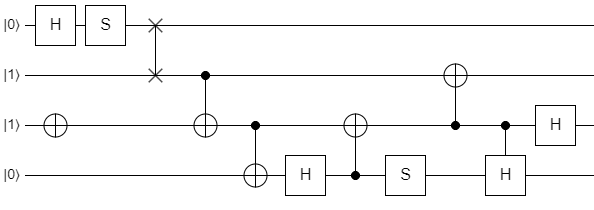

In [102]:
circuit = State(4)

circuit.apply_H_gate(0)
circuit.apply_S_gate(0)

circuit.apply_X_gate(2)
circuit.apply_SWAP_gate(0)

circuit.apply_CNOT_gate(1) # control bit: 0
                           #  target bit: 1
circuit.apply_CNOT_gate(2) # control bit: 2
                           #  target bit: 3
circuit.apply_H_gate(3)
circuit.apply_CNOT10_gate(2) # control bit: 3
                             #  target bit: 2
circuit.apply_S_gate(3)
circuit.apply_CNOT10_gate(1) # control bit: 2
                             # target bit: 1
circuit.apply_S_gate(3)
circuit.apply_CH_gate(2) # control bit: 2
                         # target bit: 3
circuit.apply_H_gate(2)

### Part 3: Implement circuit in Quirk

Implement the same circuit in https://algassert.com/quirk and compare the results with your code.

### Part 4: Implement circuit in IBM Qiskit

#### 4.1: Qiskit local

Implement the same circuit using Qiskit, run it using the local Qiskit AER simulator and compare the results with your code.

Hint: read the docs https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.html#

In [103]:
# # EXAMPLE QISKIT USAGE
# # install with: pip install qiskit
# # then restart Jupyter
# 
# # Import qiskit
# from qiskit import QuantumCircuit, transpile, assemble, Aer, execute
# from qiskit.visualization import plot_histogram
# 
# # Example circuit: 2-qubit Bell state
# qc = QuantumCircuit(2)
# qc.h(0)
# qc.cx(0, 1)
# 
# # Simulate the circuit
# simulator = Aer.get_backend('aer_simulator')
# qc_compiled = transpile(qc, simulator)
# qobj = assemble(qc_compiled)
# result = simulator.run(qobj).result()
# 
# # Get the results and plot
# counts = result.get_counts(qc)
# plot_histogram(counts)

ModuleNotFoundError: No module named 'qiskit'

#### 4.2: Run Qiskit on real quantum hardware

Run the Qiskit simulator on real quantum hardware provided by IBM.

In [ ]:
# EXAMPLE IBMQ USAGE

# Obtain an IBM API key from https://quantum-computing.ibm.com/
# Configure API key and load you account
from qiskit import IBMQ
IBMQ.save_account('YOUR_API_TOKEN')
IBMQ.load_account()

# Connect to one of the IBM quantum devices
provider = IBMQ.get_provider(hub='ibm-q')
backend = provider.get_backend('ibmq_manila')  # Replace with an available backend

# Run the same circuit as before
qobj = assemble(qc_compiled, backend)
job = backend.run(qobj)
result = job.result()

# Get the results and plot
counts = result.get_counts(qc)
plot_histogram(counts)

## Conclusion
Congrats! You have done real quantum!